In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facial-expression-dataset/test/test/surprise/PublicTest_78686873.jpg
/kaggle/input/facial-expression-dataset/test/test/surprise/PrivateTest_58522921.jpg
/kaggle/input/facial-expression-dataset/test/test/surprise/PrivateTest_83796714.jpg
/kaggle/input/facial-expression-dataset/test/test/surprise/PublicTest_84428313.jpg
/kaggle/input/facial-expression-dataset/test/test/surprise/PrivateTest_87978901.jpg
/kaggle/input/facial-expression-dataset/test/test/surprise/PrivateTest_90978621.jpg
/kaggle/input/facial-expression-dataset/test/test/surprise/PrivateTest_27580582.jpg
/kaggle/input/facial-expression-dataset/test/test/surprise/PublicTest_15760011.jpg
/kaggle/input/facial-expression-dataset/test/test/surprise/PublicTest_49739228.jpg
/kaggle/input/facial-expression-dataset/test/test/surprise/PublicTest_5351857.jpg
/kaggle/input/facial-expression-dataset/test/test/surprise/PrivateTest_56096676.jpg
/kaggle/input/facial-expression-dataset/test/test/surprise/PrivateTest_71692098.jp

# **Import Modules**


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPooling2D



2024-03-22 09:36:27.600842: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-22 09:36:27.600975: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-22 09:36:27.763870: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Load The Data Set

In [3]:
Train_dir="../input/facial-expression-dataset/train/train/"
Test_dir="../input/facial-expression-dataset/test/test/"

In [4]:
def load_dataset(directory):
    image_paths=[]
    labels=[]
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path=os.path.join(directory,label,filename)
            image_paths.append(image_path)
            labels.append(label)
            print(label,"completed")
    return image_paths,labels        

In [5]:
##convert into dataframe
train=pd.DataFrame()
train['image'],train['label']=load_dataset(Train_dir)
##shuffle the dataset
train=train.sample(frac=1).reset_index(drop=True)
train.head()

surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise com

,image,label
0,../input/facial-expression-dataset/train/train...,sad
1,../input/facial-expression-dataset/train/train...,neutral
2,../input/facial-expression-dataset/train/train...,sad
3,../input/facial-expression-dataset/train/train...,neutral
4,../input/facial-expression-dataset/train/train...,angry


In [6]:
test=pd.DataFrame()
test['image'],test['label']=load_dataset(Test_dir)
test.head()


surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise completed
surprise com

,image,label
0,../input/facial-expression-dataset/test/test/s...,surprise
1,../input/facial-expression-dataset/test/test/s...,surprise
2,../input/facial-expression-dataset/test/test/s...,surprise
3,../input/facial-expression-dataset/test/test/s...,surprise
4,../input/facial-expression-dataset/test/test/s...,surprise


# Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

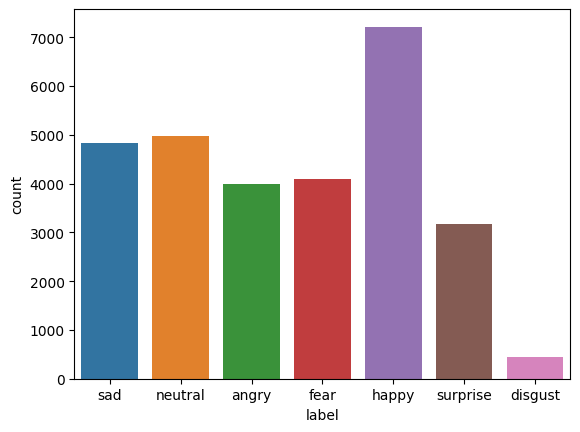

In [7]:
# sns.countplot(train['label'])

# Plot countplot using 'label' column as x parameter
sns.countplot(data=train, x='label')


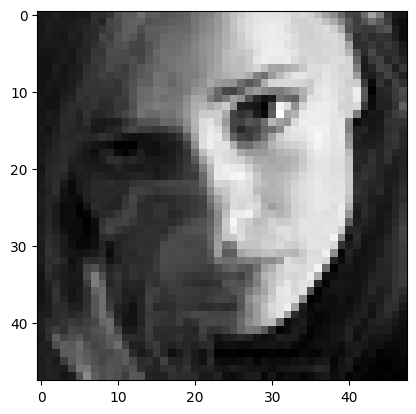

In [8]:
#load asingle image
from PIL import Image
img=Image.open(train['image'][0])
plt.imshow(img,cmap='gray');

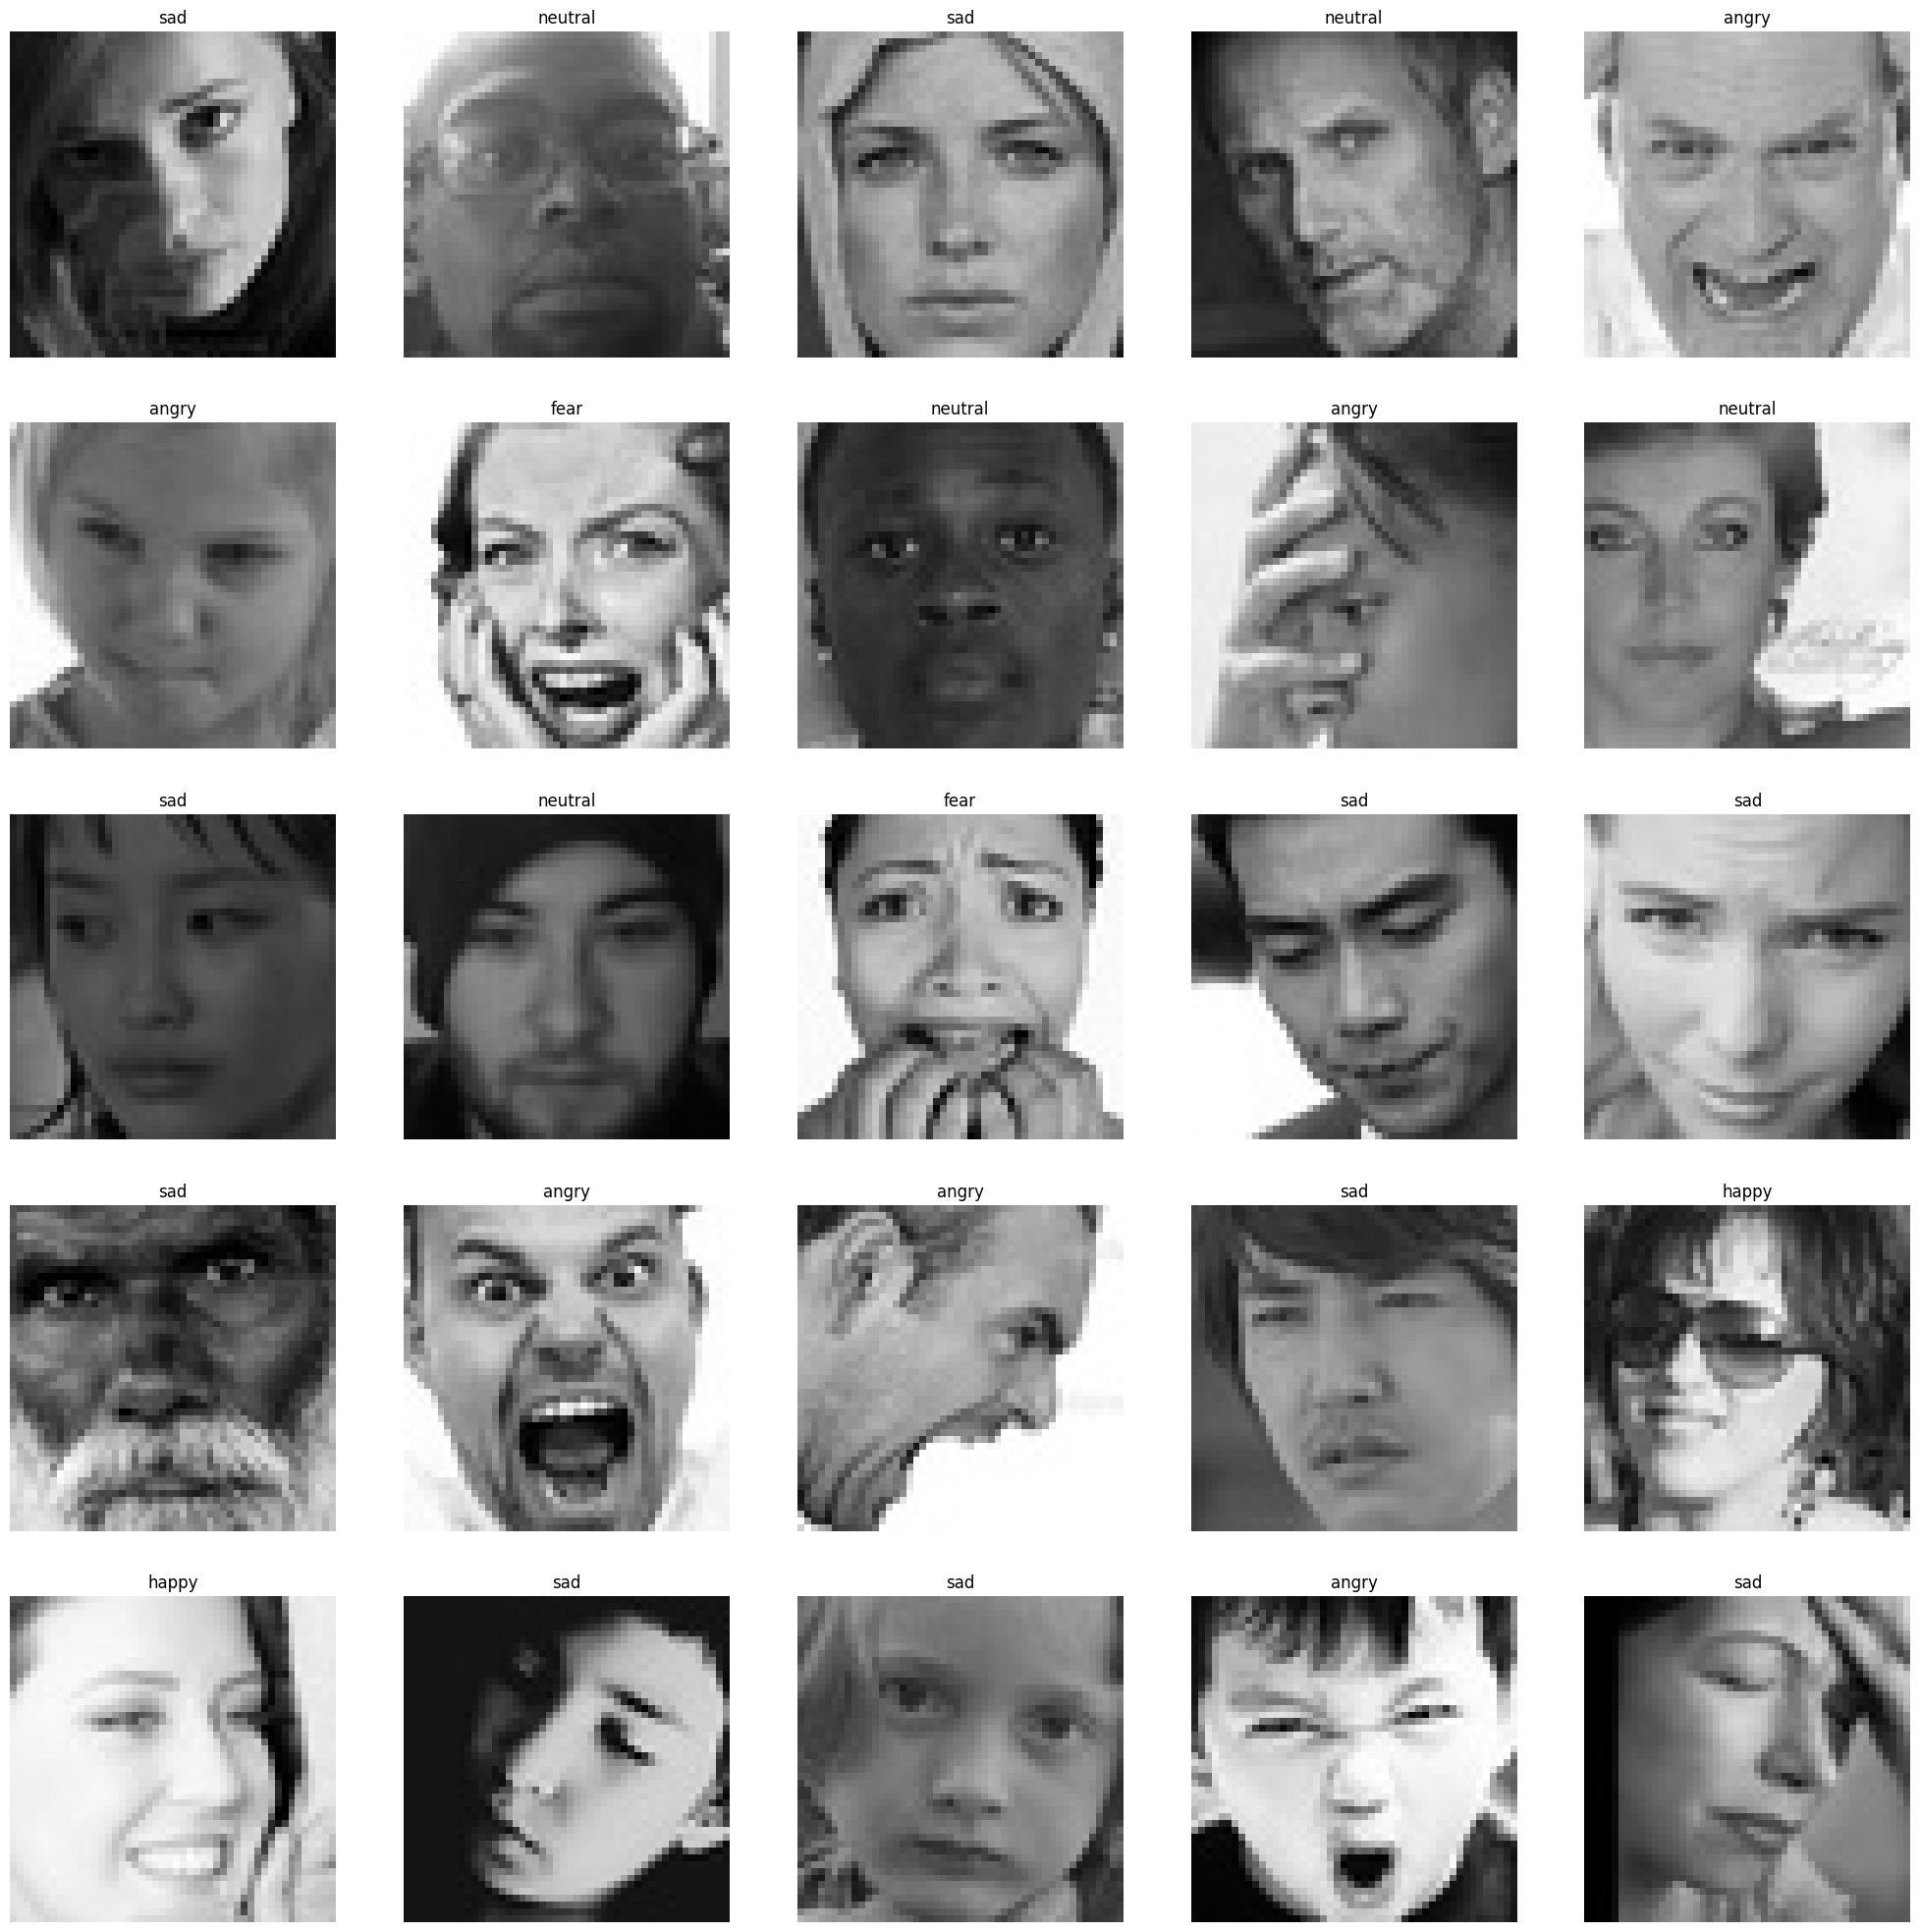

In [9]:
#To display grid of images
plt.figure(figsize=(25,25))
files=train.iloc[0:25]
for index,file,label in files.itertuples():
    plt.subplot(5,5,index+1)
    img=load_img(file)
    img=np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    

# Feature Extraction

In [10]:
def extract_features(images):
    features=[]
    for image in tqdm(images):
#         img=load_img(image,grayscale=True)
        img = load_img(image, color_mode='grayscale')
        img=np.array(img)
        features.append(img)
    features=np.array(features)
    features=features.reshape(len(features),48,48,1)
    return features

In [11]:
train_features=extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [12]:
test_features=extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [13]:
##Normalize the image
x_train=train_features/255.0
x_test=test_features/255.0

In [14]:
##convert label to integer
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
le.fit(train['label'])
y_train=le.transform(train['label'])
y_test=le.transform(test['label'])

In [15]:
y_train=to_categorical(y_train,num_classes=7)
y_test=to_categorical(y_test,num_classes=7)

In [16]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0.])

In [17]:
#Configuration
input_shape=(48,48,1)
output_class=7

# Model Creation

In [18]:
model=Sequential()
#Convolutional layers
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model=Sequential()
model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model=Sequential()
model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model=Sequential()
model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

#fully connected layers
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

#output layer
model.add(Dense(output_class,activation='softmax'))

# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [19]:
#Train The Model
history=model.fit(x=x_train,y=y_train,batch_size=128,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 755s 3s/step - accuracy: 0.2268 - loss: 2.3039 - val_accuracy: 0.3587 - val_loss: 1.6428
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 799s 3s/step - accuracy: 0.3526 - loss: 1.6463 - val_accuracy: 0.4171 - val_loss: 1.5030
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 805s 3s/step - accuracy: 0.4062 - loss: 1.5254 - val_accuracy: 0.4471 - val_loss: 1.4516
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 746s 3s/step - accuracy: 0.4433 - loss: 1.4360 - val_accuracy: 0.4419 - val_loss: 1.4398
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 800s 3s/step - accuracy: 0.4886 - loss: 1.3447 - val_accuracy: 0.4763 - val_loss: 1.3721
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 804s 3s/step - accuracy: 0.5271 - loss: 1.2413 - val_accuracy: 0.4827 - val_loss: 1.3498
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 744s 3s/step - accuracy: 0.5679 - loss: 1.1592 - val_accuracy: 0.4780 - val_loss: 1.3806
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 808s 3s/step - accuracy: 0.6010 - loss: 1.0734 - val_accu

# Plot The Results

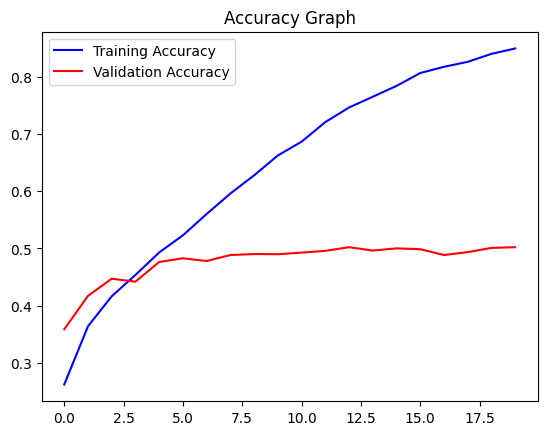

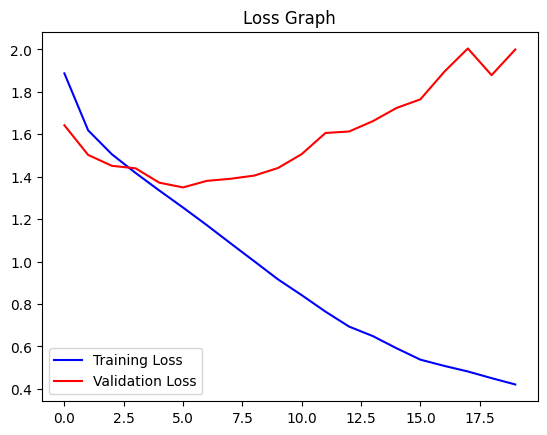

In [20]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))

plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(loss))

plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

# Test With Image Data

Original Output: happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted Output: happy


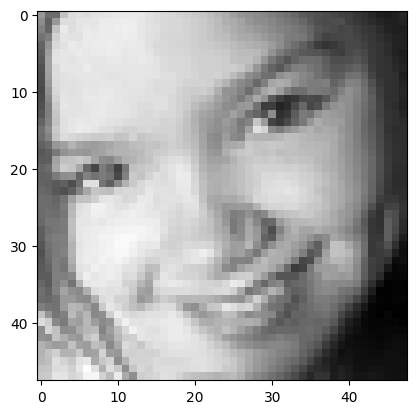

In [35]:
# image_index=random.randint(0,len(test))
# print("Original Output:",test['label'][image_index])
# pred=model.predict(x_test[image_index].reshape(1,48,48,1))
# prediction_label=le.inverse_transform([pred.argmax()])[0]
# print("Predicted Ouput:",prediction_label)
# plt.imshow(x_test[image_index].reshape(48,48),amap='gray')

import random

# Your existing code
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')  # Note the corrected argument 'cmap' instead of 'amap'
